## Unidade 01 - Projeto 01

- **Aluno**: Ailson Forte dos Santos
- **Matrícula**: 2016041269

In [1]:
# Carregando DataFrame para notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
arquivo = 'imd_notas_02.xlsx'
excel = pd.ExcelFile(arquivo)
dados = excel.parse(0)
dados.head()

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enen-nota,bairro
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado,618.0,Tirol
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado,618.0,Tirol
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado,615.0,Planalto
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,600.0,Cidade Nova
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,673.0,Neópolis


#### 1)  Quantas vezes um aluno precisa fazer uma determinada disicplina para ter aprovação?
    a) Por disciplina?
    b) Geral (considerando as 7  disciplinas)?

In [2]:
# questão 1
discs = {} # disciplinas(keys) e seus alunos(values)
qtd_disc = [[] for i in dados['disciplina_ID'].unique()] # quantidade de alunos aprovados distintos em cada disciplina
qtd_ap_disc = {} # quantidade de alunos aprovados em cada disciplina
for i in dados['disciplina_ID'].unique():
    discs[i] = [row for row in dados.get_values() if row[8] == i]
print('a)')
for i in dados['disciplina_ID'].unique():
    qtd_disc[i] = [row[0] for row in discs[i] if row[9]=='Aprovado' and row[0] not in qtd_disc[i]]
    qtd_ap_disc[i] = [row for row in discs[i] for a in qtd_disc[i] if a == row[0]]
    print('Disciplina ' + str(i) + ' - ' + str(len(qtd_ap_disc[i])/len(qtd_disc[i])))
print('b)')
qtd = 0
for i in dados['disciplina_ID'].unique():
    qtd = qtd + len(qtd_ap_disc[i])/len(qtd_disc[i])
print(qtd/7)

a)
Disciplina 0 - 1.33810888252149
Disciplina 1 - 1.0299850074962518
Disciplina 2 - 1.1359026369168357
Disciplina 3 - 1.3333333333333333
Disciplina 4 - 1.0313111545988258
Disciplina 5 - 1.3653846153846154
Disciplina 6 - 1.096774193548387
b)
1.19011426054282


#### 2) Quais as regiões tem mais índices de aprovação nos componentes curriculares? Bar.

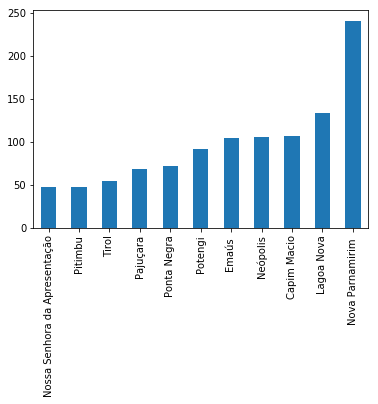

In [3]:
# questão 2
%matplotlib inline
bairros = {}
for i in  dados['bairro'].unique():
    bairros[i] = 0
for row in dados.get_values():
    if row[9] == 'Aprovado':
        bairros[row[11]] = bairros[row[11]] + 1
plt_bairros = pd.DataFrame.from_dict(bairros,orient='index')
plt_bairros.sort_values(0,inplace=True,ascending=False)
plt_bairros = plt_bairros[1:12]
plt_bairros.sort_values(0,inplace=True)
plt_bairros.plot(kind='bar',legend=False)

In [4]:
# questão 3 pré-processamento
discs_geral = {} # disciplinas(keys) e seus alunos(values)
columns = list(dados.columns)
for i in dados['disciplina_ID'].unique():
    discs_geral[i] = {}
for i in dados['disciplina_ID'].unique():
    for c in columns:
        discs_geral[i][c] = []
for row in dados.get_values(): # separendo os dados de cada aluno na respectiva disciplina
    for j, c in enumerate(columns):
        discs_geral[row[8]][c].append(row[j])
disc_ano = {}
for i in dados['disciplina_ID'].unique(): # fazendo um dataframe pra cada disciplina
    discs_geral[i] = pd.DataFrame.from_dict(discs_geral[i])
    disc_ano[i] = []
    for j in discs_geral[i]['ano_disciplina'].unique():
        disc_ano[i].append([])
for i in dados['disciplina_ID'].unique(): # fazendo um dataframe pra cada disciplina
    for row in discs_geral[i].get_values():
        disc_ano[i][row[2]-2014].append(row[7])
    disc_ano[i] = pd.DataFrame.from_dict(disc_ano[i])
for i in dados['disciplina_ID'].unique(): # fazendo um dataframe pra cada disciplina
    ind = discs_geral[i]['ano_disciplina'].unique()
    disc_ano[i].set_index(ind,inplace=True)
    disc_ano[i] = disc_ano[i].transpose()

#### 3) Como estão caracterizados a  estatística de notas das diversas disciplinas que compoe o dataset? Boxplot
    a) Período (ano)
    b) Geral

a)


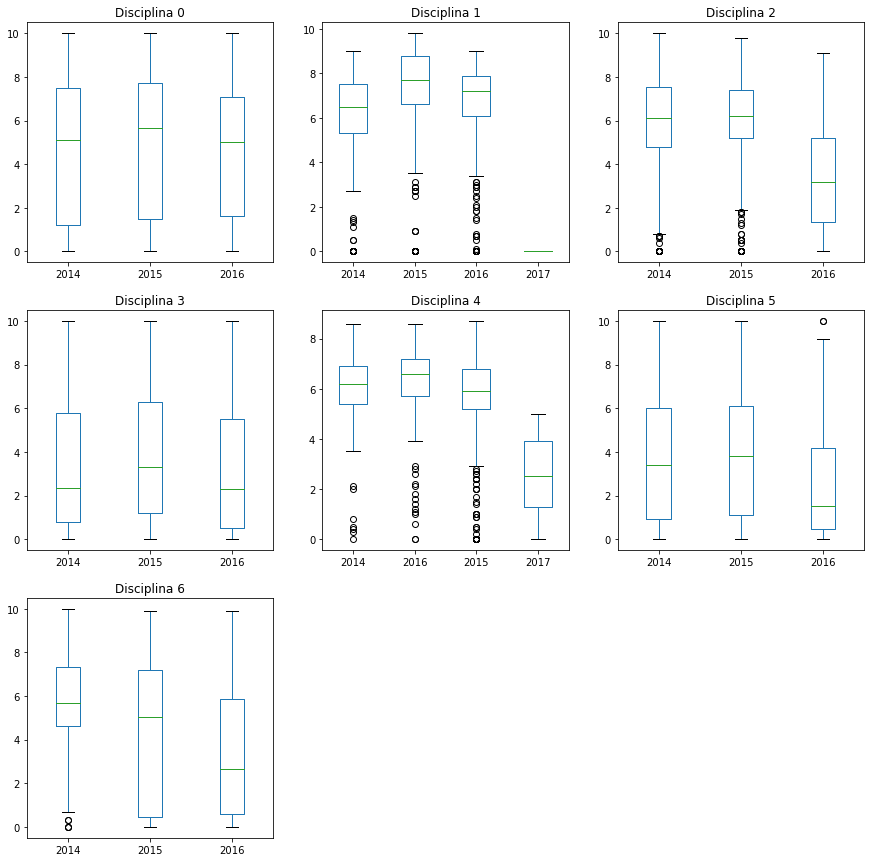

In [5]:
print('a)')
fig = plt.figure(figsize=(15,15))
for i in dados['disciplina_ID'].unique(): # fazendo um dataframe pra cada disciplina
    ax = fig.add_subplot(len(dados['disciplina_ID'].unique())/2,len(dados['disciplina_ID'].unique())/2,i+1)
    ax= disc_ano[i].plot(kind='box',title="Disciplina " + str(i), ax=ax)

b)


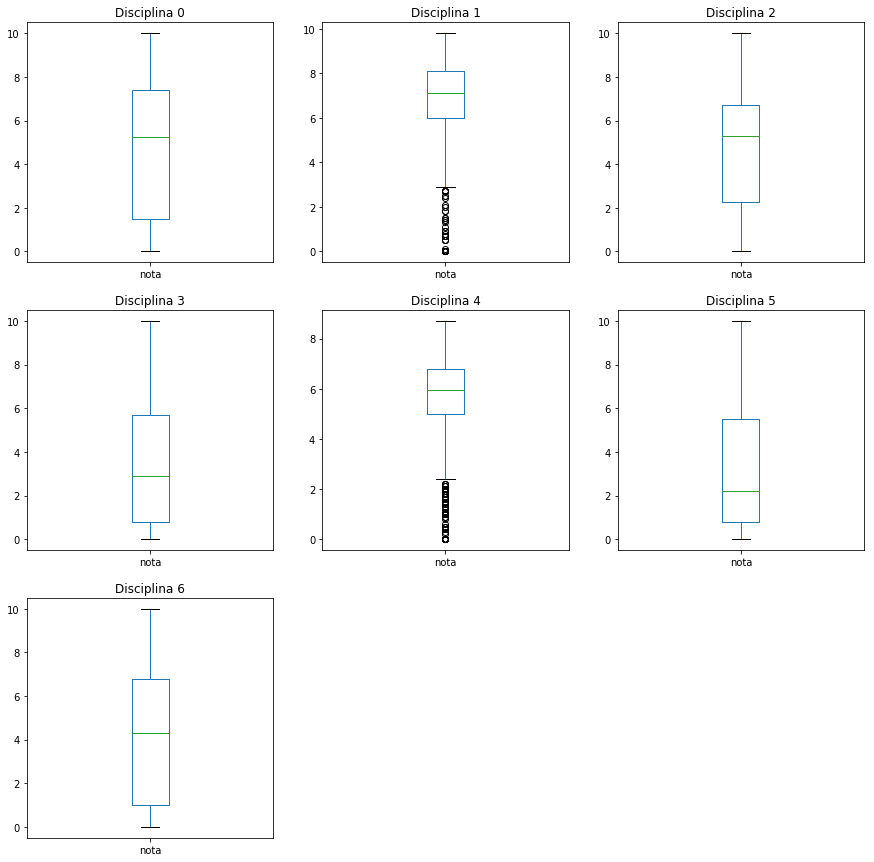

In [6]:
print('b)')
fig = plt.figure(figsize=(15,15))
for i in dados['disciplina_ID'].unique(): # fazendo um dataframe pra cada disciplina
    ax = fig.add_subplot(len(dados['disciplina_ID'].unique())/2,len(dados['disciplina_ID'].unique())/2,i+1)
    ax= discs_geral[i].plot(kind='box',title="Disciplina " + str(i),x='ano_disciplina',y='nota',ax=ax)

#### 4) Existe correlação entre as notas dos diferentes componentes curriculares? Dispersão

In [7]:
alunos = {}
discs_alunos = {}
for i in dados['a_ID'].unique():
    discs_alunos[i] = {}
for i in dados['disciplina_ID'].unique():
    for j in discs_geral[i]['a_ID'].unique():
        discs_alunos[j][i] = [row[7] for row in discs_geral[i].get_values() if j == row[1]]
# fig = plt.figure(figsize=(15,15))
for i in dados['a_ID'].unique(): # fazendo um dataframe pra cada disciplina
    discs_alunos[i] = pd.DataFrame.from_dict(discs_alunos[i], orient='index')
#     ax = fig.add_subplot(len(dados['disciplina_ID'].unique())/2,len(dados['disciplina_ID'].unique())/2,i+1)
#     ax = discs_alunos[i].plot(kind='scatter',title=i,ax=ax)

#### 5) Existe uma relação entre o  número médio de disciplinas cursadas por aluno e  o  seu desempenho? Dispersão

In [8]:
al_geral = {} # alunos(keys) e seus dados(values)
columns = list(dados.columns)
for i in dados['a_ID'].unique():
    al_geral[i] = {}
for i in dados['a_ID'].unique():
    for c in columns:
        al_geral[i][c] = []
for row in dados.get_values(): # separendo os dados de cada aluno na respectiva disciplina
    for j, c in enumerate(columns):
        al_geral[row[0]][c].append(row[j])
for i in dados['a_ID'].unique():
    al_geral[i] = pd.DataFrame.from_dict(al_geral[i])
al_geral[0]

,CEP,a_ID,ano_disciplina,ano_ingresso,bairro,disciplina_ID,enen-nota,nota,periodo_disciplina,periodo_ingresso,status,status.disciplina
0,59015430,0,2014,2014,Tirol,0,618.0,2.6,2,1,CANCELADO,Reprovado
1,59015430,0,2015,2014,Tirol,0,618.0,8.0,1,1,CANCELADO,Aprovado
2,59015430,0,2014,2014,Tirol,1,618.0,7.1,1,1,CANCELADO,Aprovado
3,59015430,0,2014,2014,Tirol,2,618.0,5.3,1,1,CANCELADO,Aprovado
4,59015430,0,2014,2014,Tirol,3,618.0,2.6,2,1,CANCELADO,Reprovado
5,59015430,0,2015,2014,Tirol,3,618.0,1.1,2,1,CANCELADO,Reprovado
6,59015430,0,2016,2014,Tirol,3,618.0,0.7,1,1,CANCELADO,Reprovado
7,59015430,0,2014,2014,Tirol,4,618.0,5.4,2,1,CANCELADO,Aprovado
8,59015430,0,2014,2014,Tirol,5,618.0,0.1,2,1,CANCELADO,Reprovado
9,59015430,0,2015,2014,Tirol,5,618.0,1.1,1,1,CANCELADO,Reprovado


#### 6) Existe correlação entre a  nota do enen e  o  status do aluno? Hist.

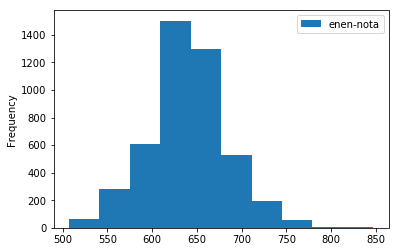

In [9]:
dados.plot(kind='hist',x='status',y='enen-nota')

#### 7) Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do ENEN? Disperção